In [ ]:
# import statsmodels.api as sm

# X = df_adv[['TV', 'Radio']] y = df_adv['Sales']
# ## fit a OLS model with intercept on TV and Radio
# X = sm.add_constant(X)
# est = sm.OLS(y, X).fit()
# est.summary()

In [ ]:
# # VIF dataframe
# vif_data = pd.DataFrame()
# vif_data["feature"] = X.columns
  
# # calculating VIF for each feature
# vif_data["VIF"] = [variance_inflation_factor(X.values, i)
#                           for i in range(len(X.columns))]
  
# print(vif_data)

# from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# https://scikit-learn.org/stable/modules/compose.html

In [ ]:
# F Value in Regression
# The F value in regression is the result of a test where the null hypothesis is that all of the regression coefficients are equal to zero. In other words, the model has no predictive capability. Basically, the f-test compares your model with zero predictor variables (the intercept only model), and decides whether your added coefficients improved the model. If you get a significant result, then whatever coefficients you included in your model improved the model’s fit.
# Read your p-value first. If the p-value is small (less than your alpha level), you can reject the null hypothesis. Only then should you consider the f-value. If you don’t reject the null, ignore the f-value.
# Many authors recommend ignoring the P values for individual regression coefficients if the overall F ratio is not statistically significant. This is because of the multiple testing problem. In other words, your p-value and f-value should both be statistically significant in order to correctly interpret the results.
# If you want to know whether your regression F-value is significant, you’ll need to find the critical value in the f-table. For example, let’s say you had 3 regression degrees of freedom (df1) and 120 residual degrees of freedom (df2). An F statistic of at least 3.95 is needed to reject the null hypothesis at an alpha level of 0.1. At this level, you stand a 1% chance of being wrong (Archdeacon, 1994, p.168). For more details on how to do this, see: F Test.
#F Values will range from 0 to an arbitrarily large number.

In [38]:
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import ExtraTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor

# Compare Algorithms
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import matplotlib.pyplot as plt
from sklearn.feature_selection import f_regression 
from sklearn.feature_selection import mutual_info_regression, SelectKBest, chi2

In [2]:
df = pd.read_csv('../Data/ProcessedCsvs/merged.csv')

In [ ]:
df.columns

In [3]:
#df['Unnamed: 0'].head(30)
# renaming the column "A"
df.rename(columns = {"'Unnamed: 0'": "RowId"}, 
          inplace = True)

#df.isnull().sum()
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

#print(df[df["5 to 14 hours"].isnull()][null_columns])
# drop all rows with any NaN and NaT values
df1 = df.dropna()
print(len(df1))

2220


In [4]:
# define x and y

y = df1['Unemployed, looking for full-time work'].values

df1 = df1.drop(columns=['SA2','Employed, worked full-time',
       'Employed, worked part-time', 'Employed, away from work',
       'Unemployed, looking for full-time work',
       'Unemployed, looking for part-time work', 'Not in the labour force',
       'Not stated', 'Total'], axis=1)

X = df1


In [5]:
X.shape, y.shape

((2220, 101), (2220,))

In [6]:

X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size = 0.25, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1665, 101), (555, 101), (1665,), (555,))

In [7]:

linr_ft = LinearRegression()

linr_ft.fit(X_train, y_train)



LinearRegression()

In [8]:
r_sq = linr_ft.score(X, y)
print('coefficient of determination:', r_sq)


coefficient of determination: 0.6131495952479051


LR: 0.328629 (0.201348)
ABR: 0.379893 (0.109870)
KNNR: -0.033703 (0.352534)
ETR: 0.055682 (0.243398)


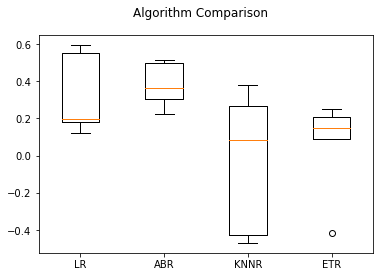

In [15]:


seed = 7
# prepare models
models = []
models.append(('LR', LinearRegression()))
models.append(('ABR', AdaBoostRegressor()))
models.append(('KNNR', KNeighborsRegressor()))
models.append(('ETR', ExtraTreeRegressor()))
# models.append(('NB', GaussianNB()))
# models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=5)
    cv_results = model_selection.cross_val_score(model, X, y, cv=kfold)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
#boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [48]:


fs = SelectKBest(score_func = f_regression, k=10)
X_train_fs = fs.fit_transform(X_train,y_train)

X_test_fs = fs.transform(X_test)

In [50]:
len(fs.scores_)


101

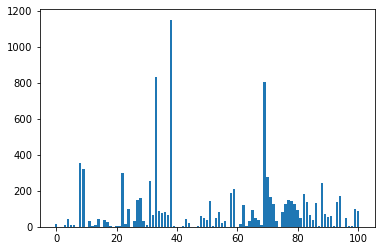

In [49]:
from matplotlib import pyplot
# what are scores for the features
#for i in range(len(fs.scores_)-20):
    #print('Feature %d: %f' % (i, fs.scores_[i]))

#fs_20 = fs[20]    
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [67]:
# using pipeline
from sklearn.pipeline import Pipeline

clf = Pipeline([
  ('feature_selection', SelectKBest(score_func = f_regression, k=40)),
  ('regression', LinearRegression())
])
clf.fit(X_train, y_train)

Pipeline(steps=[('feature_selection',
                 SelectKBest(k=40,
                             score_func=<function f_regression at 0x7f937b39f430>)),
                ('regression', LinearRegression())])

In [68]:
clf.score(X_test, y_test)

0.5406723350248417

In [30]:
linr_ft1 = LinearRegression()

linr_ft1.fit(features, y_train)



LinearRegression()

In [33]:
r_sq1 = linr_ft1.score(features, y_train)
print('coefficient of determination:', r_sq1)

coefficient of determination: 0.4474531757728639


In [23]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
sel.fit_transform(X)

array([[0.000e+00, 8.220e+00, 1.300e+01, ..., 2.069e+01, 5.650e+01,
        3.395e+01],
       [1.000e+00, 2.260e+00, 7.140e+00, ..., 1.662e+01, 7.669e+01,
        1.707e+01],
       [2.000e+00, 1.730e+00, 1.375e+01, ..., 1.154e+01, 7.218e+01,
        1.827e+01],
       ...,
       [2.307e+03, 3.700e+00, 3.598e+01, ..., 1.429e+01, 5.714e+01,
        3.862e+01],
       [2.309e+03, 0.000e+00, 0.000e+00, ..., 0.000e+00, 3.750e+01,
        0.000e+00],
       [2.310e+03, 3.910e+00, 7.400e+00, ..., 1.781e+01, 7.242e+01,
        2.083e+01]])